### 逻辑回归--LogicitisRegression


Sigmoid函数 $$s(z)=\cfrac{1}{1+e^{-z}}$$

In [1]:
import numpy as np
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [2]:
sigmoid(0),sigmoid(4), sigmoid(-4)

(0.5, 0.98201379003790845, 0.017986209962091559)

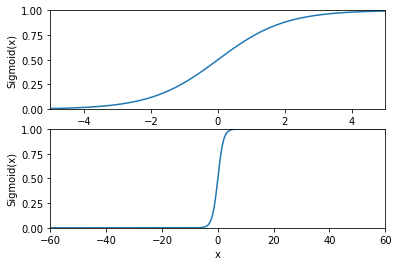

In [3]:
# 出自《机器学习实战》中Sigmoid函数的画图代码
import sys
from pylab import *

t = arange(-60.0, 60.3, 0.1)
s = 1/(1 + exp(-t))
ax = subplot(211)
ax.plot(t,s)
ax.axis([-5,5,0,1])
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
ax = subplot(212)
ax.plot(t,s)
ax.axis([-60,60,0,1])
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
show()

#### 使用梯度上升找到最佳参数
##### 伪码：
每个参数初始化为1

重复R次：

    计算整个数据的梯度
    使用alpha*gradient更新参数向量
    
返回参数向量

#### 准备数据

In [4]:
def load_data_set():
    data_mat = [];
    label_mat = [];
    with open("testSet.txt") as f:
        for line in f.readlines():
            line_arr = line.strip().split()
            data_mat.append([1.0, float(line_arr[0]), float(line_arr[1])])
            label_mat.append(int(line_arr[2]))
    return data_mat, label_mat


In [5]:
data_mat, label_mat = load_data_set()

In [6]:
print(data_mat)

[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743], [1.0, 0.850433, 6.920334], [1.0, 1.347183, 13.1755], [1.0, 1.176813, 3.16702], [1.0, -1.781871, 9.097953], [1.0, -0.566606, 5.749003], [1.0, 0.931635, 1.589505], [1.0, -0.024205, 6.151823], [1.0, -0.036453, 2.690988], [1.0, -0.196949, 0.444165], [1.0, 1.014459, 5.754399], [1.0, 1.985298, 3.230619], [1.0, -1.693453, -0.55754], [1.0, -0.576525, 11.778922], [1.0, -0.346811, -1.67873], [1.0, -2.124484, 2.672471], [1.0, 1.217916, 9.597015], [1.0, -0.733928, 9.098687], [1.0, -3.642001, -1.618087], [1.0, 0.315985, 3.523953], [1.0, 1.416614, 9.619232], [1.0, -0.386323, 3.989286], [1.0, 0.556921, 8.294984], [1.0, 1.224863, 11.58736], [1.0, -1.347803, -2.406051], [1.0, 1.196604, 4.951851], [1.0, 0.275221, 9.543647], [1.0,

In [29]:
m, n = np.shape(np.mat(data_mat))
m, n, sum(np.array(data_mat)[1] * np.ones(n)), np.mat(data_mat)[1] * np.ones((n, 1))

(100, 3, 4.2669069999999998, matrix([[ 4.266907]]))

In [13]:
np.mat(label_mat).transpose()[1]

matrix([[1]])

In [7]:
print(label_mat)

[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0]


#### 梯度上升法

In [30]:
def gradAscent(data_mat, label_mat):
    data_matrix = np.mat(data_mat)
    label_matrix = np.mat(label_mat).transpose()
    m, n = np.shape(data_matrix)
    alpha = 0.001
    max_cycles = 500
    theta = np.ones((n,1))
    for i in range(max_cycles):
        h = sigmoid(data_matrix * theta)
        cost = label_matrix - h
        theta = theta + alpha * data_matrix.transpose() * cost
    return theta

In [31]:
theta = gradAscent(data_mat, label_mat)
theta.getA()

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])



#### 画出决策分界

In [32]:
data_arr = array(data_mat)
n = np.shape(data_arr)[0]
data_arr, n

(array([[  1.00000000e+00,  -1.76120000e-02,   1.40530640e+01],
        [  1.00000000e+00,  -1.39563400e+00,   4.66254100e+00],
        [  1.00000000e+00,  -7.52157000e-01,   6.53862000e+00],
        [  1.00000000e+00,  -1.32237100e+00,   7.15285300e+00],
        [  1.00000000e+00,   4.23363000e-01,   1.10546770e+01],
        [  1.00000000e+00,   4.06704000e-01,   7.06733500e+00],
        [  1.00000000e+00,   6.67394000e-01,   1.27414520e+01],
        [  1.00000000e+00,  -2.46015000e+00,   6.86680500e+00],
        [  1.00000000e+00,   5.69411000e-01,   9.54875500e+00],
        [  1.00000000e+00,  -2.66320000e-02,   1.04277430e+01],
        [  1.00000000e+00,   8.50433000e-01,   6.92033400e+00],
        [  1.00000000e+00,   1.34718300e+00,   1.31755000e+01],
        [  1.00000000e+00,   1.17681300e+00,   3.16702000e+00],
        [  1.00000000e+00,  -1.78187100e+00,   9.09795300e+00],
        [  1.00000000e+00,  -5.66606000e-01,   5.74900300e+00],
        [  1.00000000e+00,   9.31635000e

In [33]:
def plotBestFit(theta):
    import matplotlib.pyplot as plt
    data_mat, label_mat = load_data_set()
    data_arr = np.array(data_mat)
    n = np.shape(data_arr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(label_mat[i]) == 1:
            xcord1.append(data_arr[i,1])
            ycord1.append(data_arr[i,2])
        else:
            xcord2.append(data_arr[i,1])
            ycord2.append(data_arr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c="red", marker="s")
    ax.scatter(xcord2, ycord2, s=30, c="green")
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-theta[0] - theta[1]*x) / theta[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    
    

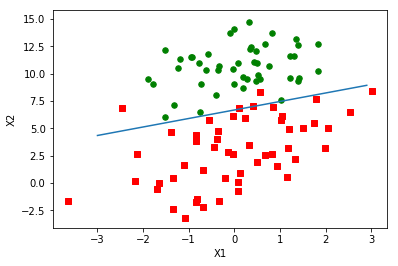

In [34]:
plotBestFit(theta.getA())

#### 随机梯度上升法

In [38]:
def stocGradAscent(data_mat, label_mat):
    data_arr = np.array(data_mat)
    m, n = np.shape(data_arr)
    theta = np.ones(n)
    alpha = 0.01
    for i in range(m):
        h = sigmoid(sum(data_arr[i]*theta))
        error = label_mat[i] - h
        theta = theta + alpha * error *  data_arr[i]
    return theta


In [39]:
theta = stocGradAscent(data_mat, label_mat)
theta

array([ 1.01702007,  0.85914348, -0.36579921])

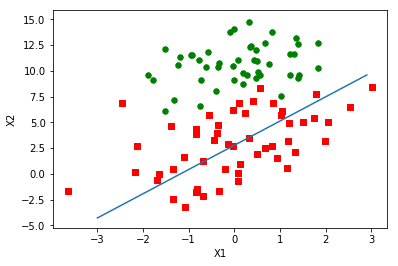

In [40]:
plotBestFit(theta)

#### 改进后的随机梯度上升法

In [46]:
import random
def stocGradAscent1(data_mat, label_mat, numIter=150):
    data_arr = np.array(data_mat)
    m, n = np.shape(data_arr)
    theta = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            # 每次迭代时调整alpha
            alpha = 4 / (1.0 + j + i) + 0.01
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(data_arr[randIndex]*theta))
            error = label_mat[randIndex] - h
            theta = theta + alpha * error *  data_arr[randIndex]
            del(dataIndex[randIndex])
    return theta


In [47]:
theta = stocGradAscent1(data_mat, label_mat)
theta

array([ 13.83229738,   0.83179244,  -1.86470706])

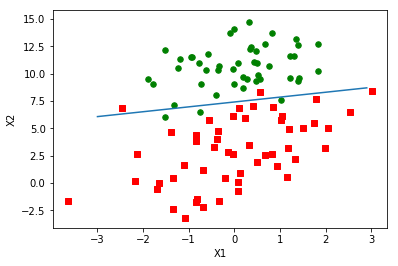

In [48]:
plotBestFit(theta)